In [23]:
import cv2
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [15]:
model=ResNet50(weights='imagenet')

In [16]:
img_path='/content/download.jpg'
img=image.load_img(img_path, target_size=(224,224))
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array, axis=0)
img_array=preprocess_input(img_array)

In [17]:
predictions = model.predict(img_array)

1/1 [==============================] - 2s 2s/step


In [18]:
decode_predictions=decode_predictions(predictions)

In [19]:
for i, (imagenet_id, label, score) in enumerate(decode_predictions[0]):
  print(f"{i+1}:{label} ({score:.2f})")

1:African_elephant (0.70)
2:tusker (0.20)
3:Indian_elephant (0.09)
4:seashore (0.00)
5:chain_mail (0.00)


In [20]:
img=cv2.imread(img_path)
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [21]:
for _, label, score in decode_predictions[0]:
  if score>0.5:
    print(f"Object:{label}, Score:{score}")
    cv2.putText(
        img,
        f"{label}:{score:.2f}",
        (50, 50),
        cv2.FONT_HERSHEY_SIMPLEX,
        1,
        (255, 0, 0),
        2,
        cv2.LINE_AA
    )

Object:African_elephant, Score:0.7048377394676208


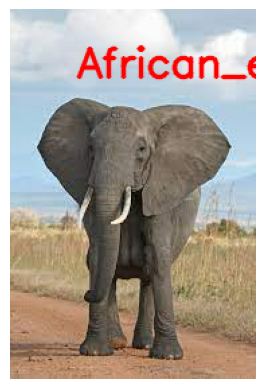

In [26]:

plt.imshow(img)
plt.axis('off')
plt.show()